In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [12]:
# Load the dataset
file_path = "Padreganda-2012-SAT-Results.csv"
df = pd.read_csv(file_path)

# Encode SAT performance levels to numerical labels
label_enc = LabelEncoder()
df["Reading_Label"] = label_enc.fit_transform(df["SAT Critical Reading Avg. Score"])
df["Math_Label"] = label_enc.fit_transform(df["SAT Math Avg. Score"])
df["Writing_Label"] = label_enc.fit_transform(df["SAT Writing Avg. Score"])

In [14]:
def train_and_visualize(subject_label, subject_name, additional_features=[]):
    print(f"\n--- {subject_name.upper()} ---")
    
    # Features
    features = ["Num of SAT Test Takers"] + additional_features
    X = df[features]
    y = df[subject_label]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Limit max_depth to simplify the tree
    clf = DecisionTreeClassifier(random_state=42, max_depth=3)
    clf.fit(X_train, y_train)
    
    # Predictions and metrics
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_enc.classes_))
    
    # Visualization with larger figure and cleaner display
    plt.figure(figsize=(20, 12))
    plot_tree(clf, 
              feature_names=features, 
              class_names=label_enc.classes_, 
              filled=True, 
              rounded=True, 
              proportion=True, 
              fontsize=10)
    plt.title(f"Decision Tree for SAT {subject_name} Performance Level")
    plt.show()


--- MATH ---
Accuracy: 0.7952755905511811
Classification Report:
               precision    recall  f1-score   support

        High       0.90      0.69      0.78        13
         Low       0.76      0.94      0.84        68
      Medium       0.85      0.61      0.71        46

    accuracy                           0.80       127
   macro avg       0.84      0.75      0.78       127
weighted avg       0.81      0.80      0.79       127



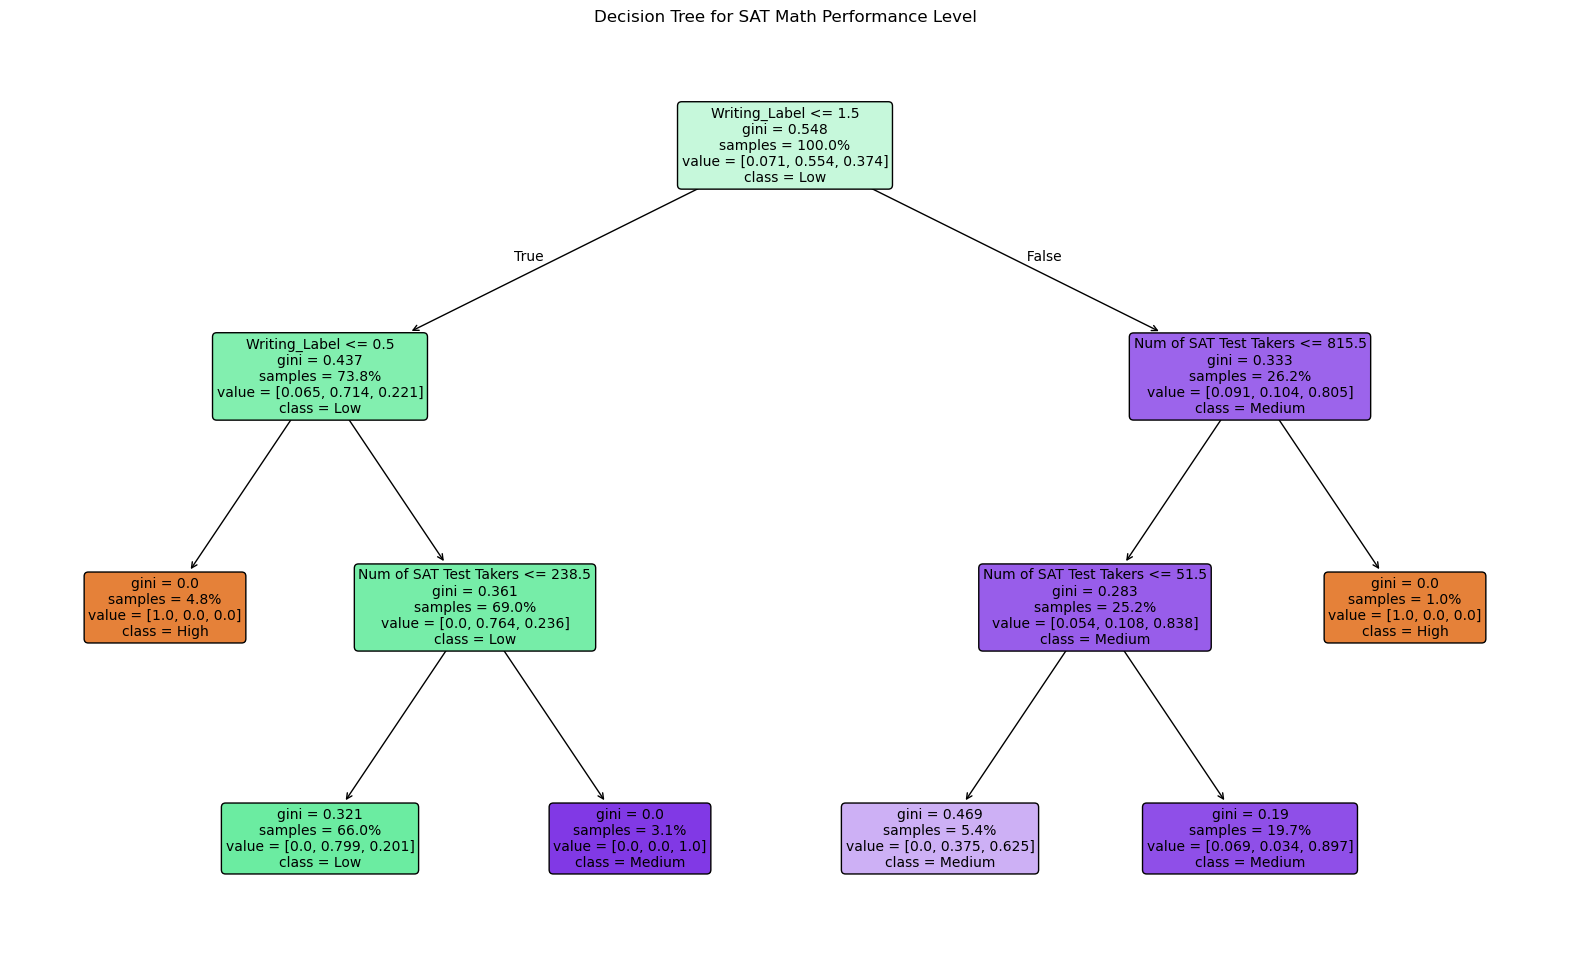


--- READING ---
Accuracy: 0.84251968503937
Classification Report:
               precision    recall  f1-score   support

        High       0.90      0.90      0.90        10
         Low       0.86      0.93      0.89        80
      Medium       0.77      0.65      0.71        37

    accuracy                           0.84       127
   macro avg       0.84      0.82      0.83       127
weighted avg       0.84      0.84      0.84       127



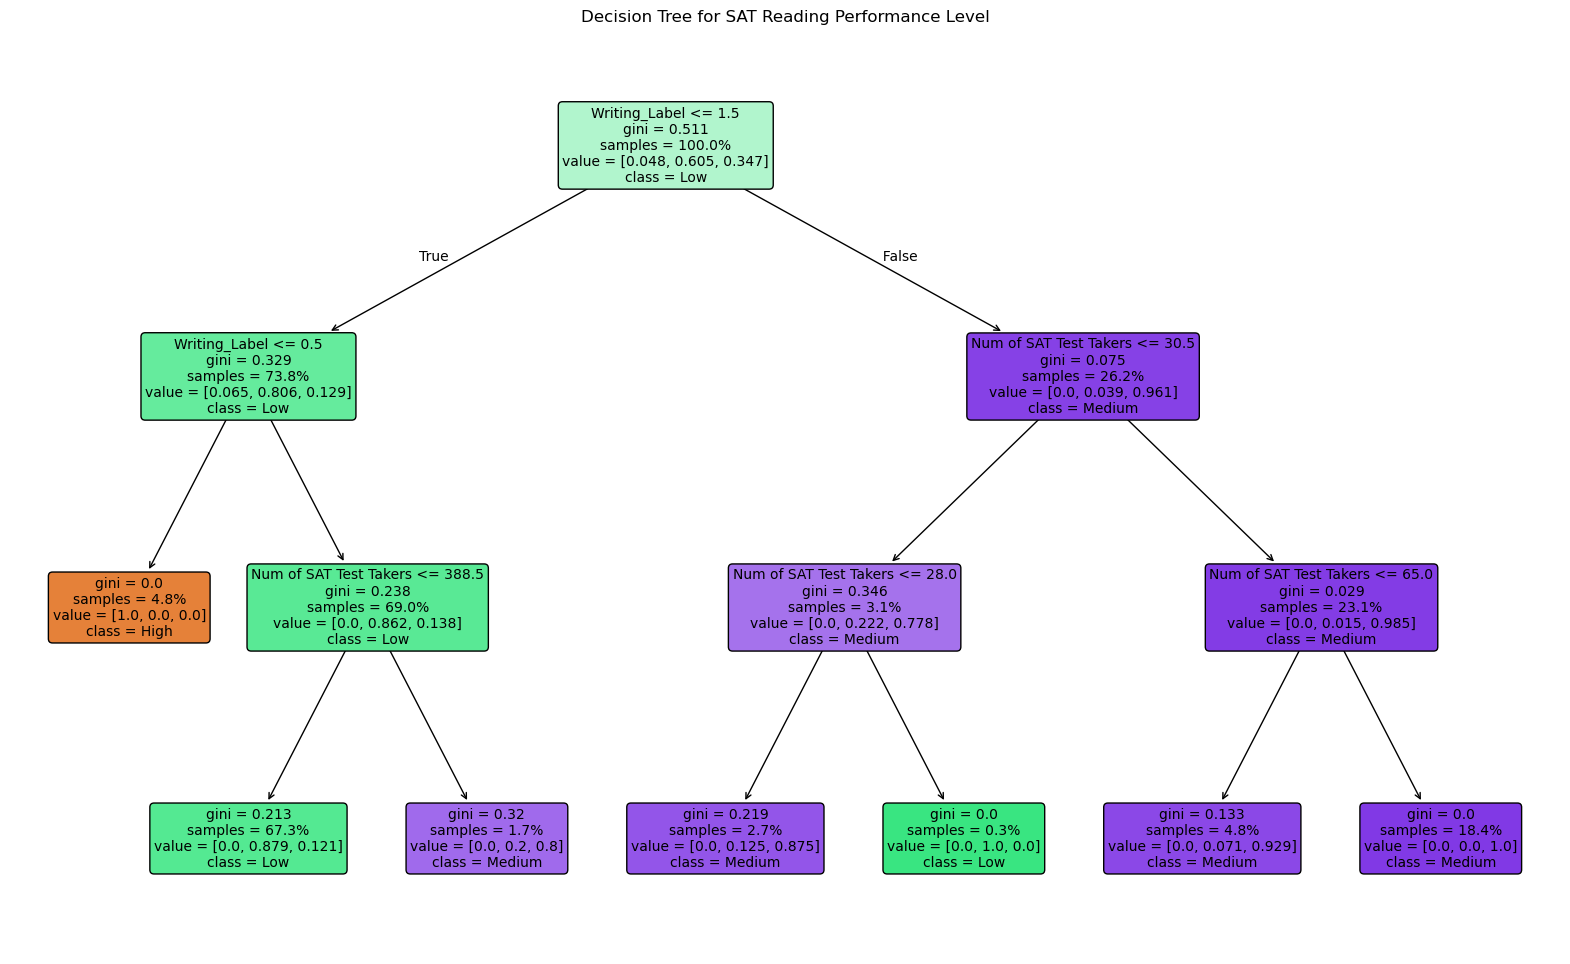


--- WRITING ---
Accuracy: 0.8503937007874016
Classification Report:
               precision    recall  f1-score   support

        High       0.73      0.80      0.76        10
         Low       0.93      0.87      0.90        90
      Medium       0.69      0.81      0.75        27

    accuracy                           0.85       127
   macro avg       0.78      0.83      0.80       127
weighted avg       0.86      0.85      0.85       127



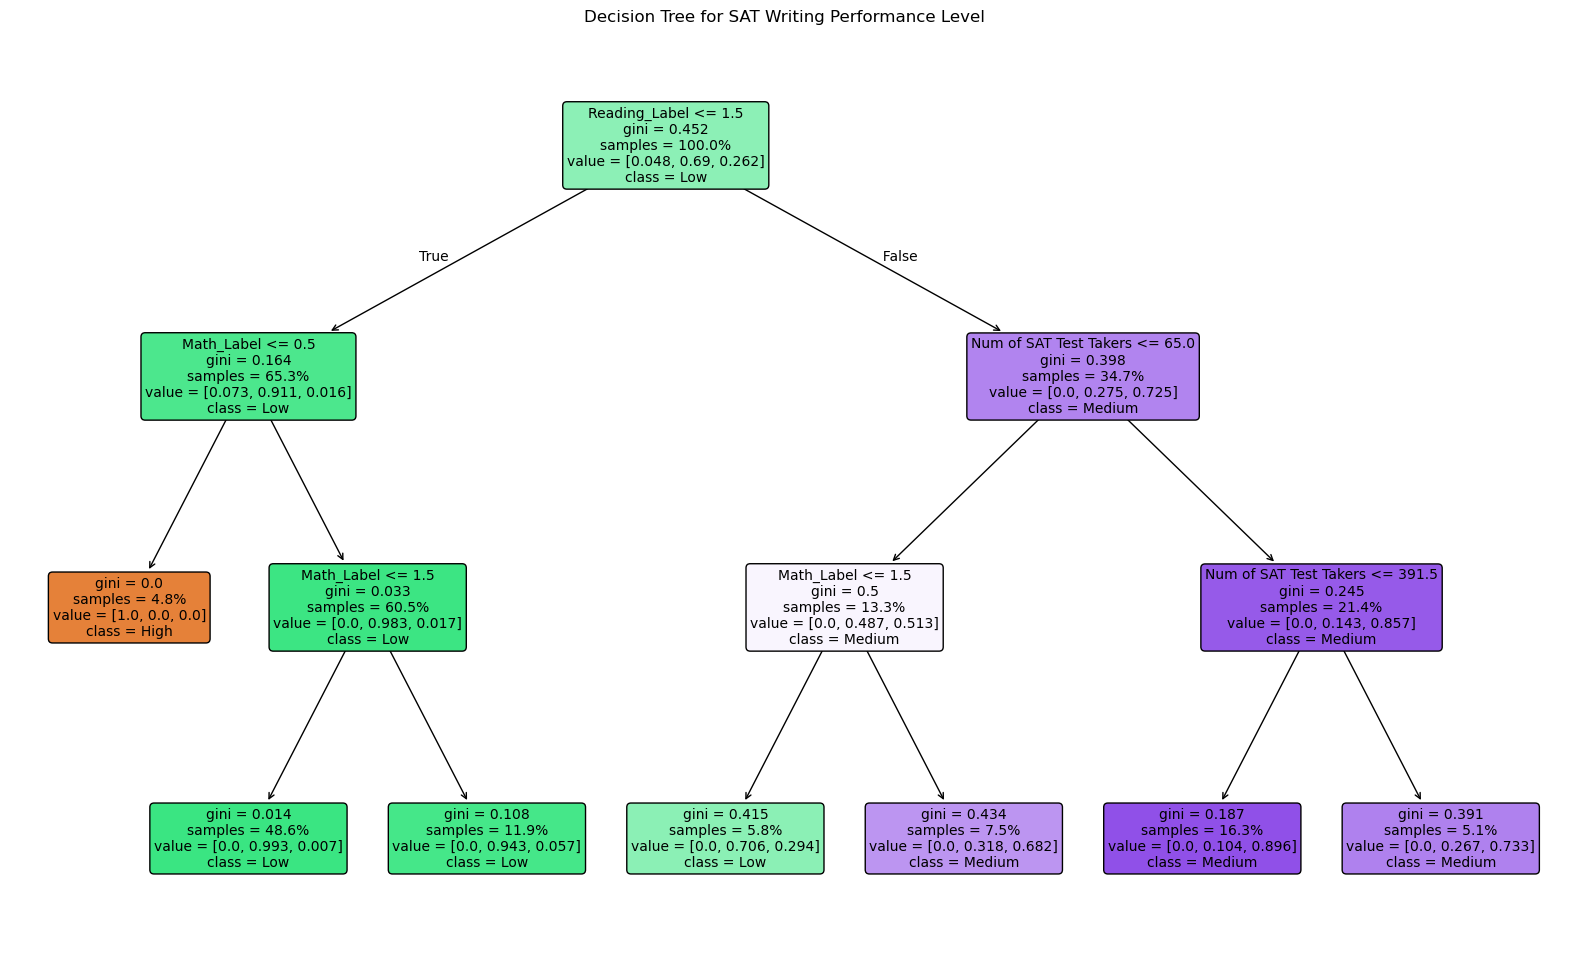

In [16]:
# Train and visualize for each SAT subject
train_and_visualize("Math_Label", "Math", additional_features=["Reading_Label", "Writing_Label"])
train_and_visualize("Reading_Label", "Reading", additional_features=["Math_Label", "Writing_Label"])
train_and_visualize("Writing_Label", "Writing", additional_features=["Reading_Label", "Math_Label"])